In [79]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv("ETH-INR.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-02-2021,121029.9609,123074.3984,113914.4844,116395.8984,116395.8984,3.240370e+12
1,05-02-2021,116398.1328,127923.8438,116398.1328,125097.6719,125097.6719,2.919440e+12
2,06-02-2021,125035.5625,126528.9531,120032.9063,122127.6172,122127.6172,2.902320e+12
3,07-02-2021,122110.0625,123014.8984,109309.8516,117507.7891,117507.7891,2.903750e+12
4,08-02-2021,117465.1641,129071.7422,114447.5469,127381.0313,127381.0313,3.501540e+12


C:\Users\home\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\home\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0, flags=flags)


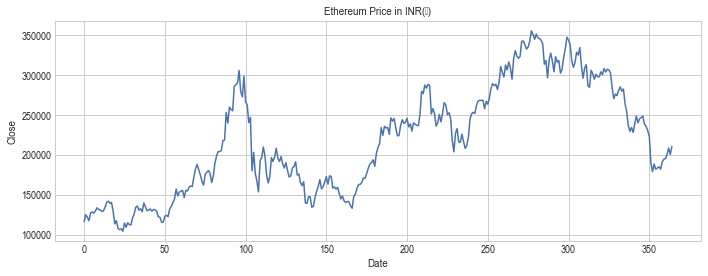

In [81]:
data.dropna()
plt.figure(figsize=(10,4))
plt.title("Ethereum Price in INR(₹)")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [82]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,218392.685460,225761.364122,209810.808770,218574.733384,218574.733384,1.861447e+12
std,68575.890043,69839.077639,67056.517353,68262.002378,68262.002378,8.201744e+11
min,104435.242200,108068.328100,95710.062500,104354.015600,104354.015600,7.061090e+11
25%,159634.375000,164180.875000,153558.171900,159908.500000,159908.500000,1.311100e+12
50%,214686.296900,221221.625000,202586.171900,214629.453100,214629.453100,1.663850e+12
75%,276693.125000,285855.625000,268096.437500,276949.062500,276949.062500,2.148440e+12
max,355554.500000,364228.468800,349691.875000,355703.531300,355703.531300,6.186120e+12


In [83]:
#We can check if there is any NaN Value present in the csv file if absent we can replace that with mean/median using the below code snippet. In the used csv there was no NaN value so I have skipped that part.
'''if pd.isnull(float("Nan")):
      from sklearn.preprocessing import Imputer
        imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
        imputer=imputer.fit(data)
        data=imputer.transform(data)'''

'if pd.isnull(float("Nan")):\n      from sklearn.preprocessing import Imputer\n        imputer=Imputer(missing_values=\'NaN\',strategy=\'mean\',axis=0)\n        imputer=imputer.fit(data)\n        data=imputer.transform(data)'

In [84]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [85]:
X

array([[1.23074398e+05, 1.13914484e+05, 1.21029961e+05, 3.24037000e+12],
       [1.27923844e+05, 1.16398133e+05, 1.16398133e+05, 2.91944000e+12],
       [1.26528953e+05, 1.20032906e+05, 1.25035562e+05, 2.90232000e+12],
       ...,
       [2.09631250e+05, 2.00005422e+05, 2.00399156e+05, 9.86259000e+11],
       [2.09470938e+05, 1.96735625e+05, 2.08687078e+05, 1.03826000e+12],
       [2.13232031e+05, 1.99865938e+05, 2.00643609e+05, 1.18706000e+12]])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [87]:
regressor = LinearRegression()

In [88]:
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
print(regressor.coef_)

[ 9.27122594e-01  6.29111950e-01 -5.67553304e-01 -7.33619188e-10]


In [90]:
print(regressor.intercept_)

2469.810441243113


In [91]:
predicted = regressor.predict(X_test)

In [92]:
print(predicted)

[170889.17386906 225988.6668216  148043.88451203 175849.7515348
 299487.97495027 304855.29897651 306159.09348941 248537.40210929
 230576.93658702 129005.20956612 313969.79202224 236954.14688694
 219746.11848848 291736.27553694 176166.89989259 319312.75056007
 194677.41173907 158269.93488812 228756.11191083 276987.52927862
 236098.19504174 255324.39085927 259503.42347009 319944.92283341
 193373.25750759 239502.03139426 142973.89965568 184831.45444946
 266555.90223421 244047.34418834 124898.91929017 188611.50121765
 189782.88430002 146143.21024921 141293.17895594 182342.23242411
 162200.21575513 162074.07071575 199025.12698047 226508.3691588
 126402.86720547 122890.97677504 249860.40026066 282609.43519168
 347925.27186173 129918.81153695 276871.17307509 156689.80987973
 347909.81142178 240597.20870914 309342.54337692 162452.10082033
 248697.87140904 338275.47994984 131522.23942032 148577.89291562
 261908.92919053 237701.90887048 197742.33828269 339504.76773341
 270273.93180769 337130.561

In [93]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [94]:
data1.head(20)

,Actual,Predicted
0,182160.2188,170889.173869
1,224497.9063,225988.666822
2,148208.7813,148043.884512
3,176791.4063,175849.751535
4,306248.0000,299487.974950
5,302737.5000,304855.298977
6,310899.1563,306159.093489
7,250652.0000,248537.402109
8,230488.6875,230576.936587
9,128811.6875,129005.209566


In [95]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 3734.0188131617865
Mean Squared Error: 27812804.411718775
Root Mean Squared Error: 5273.784638352117


In [96]:
graph = data1.head(40)

<AxesSubplot:>

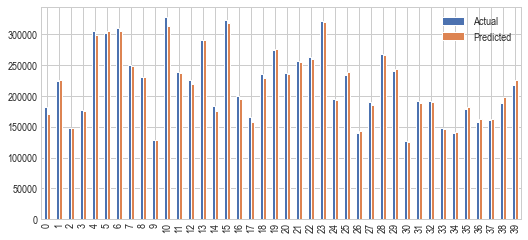

In [97]:
graph.plot(kind='bar')